In [1]:
%load_ext autoreload

In [2]:
import pandas as pd
import numpy as np
import re
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

from csv_parser import CSVParser
from markovSquares import markovSquares, markov_index_inner

In [3]:
# Define categories based on ranges or discrete values
total_df = pd.read_csv("../../Project materials(1)/resampled_data_20min.csv")

# total_df = pd.read_csv("../../resources/resampled_data_h.csv")

total_df['etaParsed'] = pd.to_datetime(total_df['etaParsed'])
total_df["time"] = pd.to_datetime(total_df['time'])

start_date = pd.to_datetime('2024-01-01')

total_df["etaParsed"] = (total_df['etaParsed'] - start_date).dt.days


total_df = total_df.drop(columns=["navstat"])



time_diffs = total_df["time"].diff()
time_interval = time_diffs.dropna().iloc[0]
time_interval = int(time_interval.total_seconds()/(60*20))



total_df.set_index("time", inplace=True)


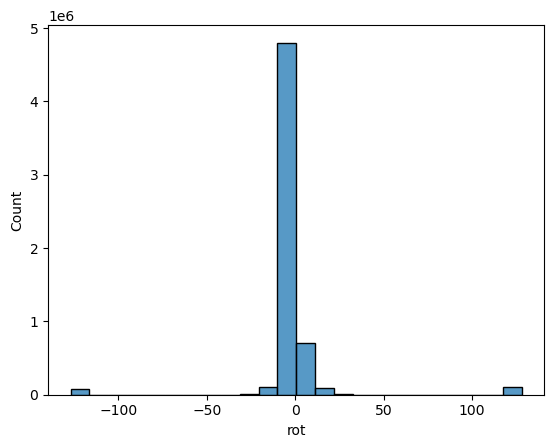

Empty DataFrame
Columns: [cog, sog, rot, heading, latitude, longitude, vesselId, portId, etaParsed, UN_LOCODE, ISO, portLongitude, portLatitude, rot_cat]
Index: []
Empty DataFrame
Columns: [cog, sog, rot, heading, latitude, longitude, vesselId, portId, etaParsed, UN_LOCODE, ISO, portLongitude, portLatitude, rot_cat]
Index: []


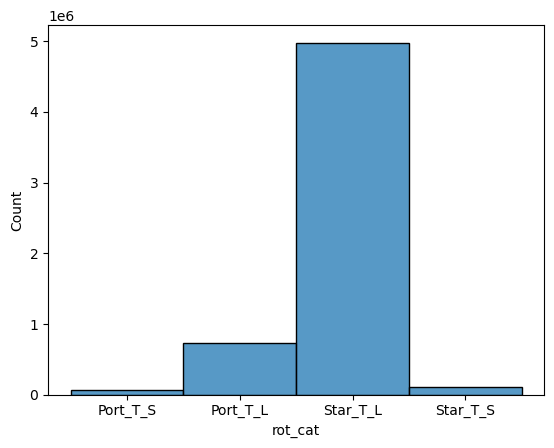

In [ ]:
#I want to make rot_values a categorical
toy_data = total_df.copy()
rot_values = total_df["rot"]

sns.histplot(x = "rot", data = total_df)

plt.show()

#This show me that I have ROT-values that are quite small, most are between 0 and -40 (by eyesight). I want to make this into a categorical based on what I see.
#But be careful about the y-axis I have a big amount of values other than between 0 and -40.

#Want to make this into a categorical.
#I want my bins to be [-127, -126, 0, 126, np.inf]

bins = [-127, -126, 0, 127, np.inf] #Based on the interpretation of the ROT and the histogram.

labels = ["Port_T_S", "Port_T_L", "Star_T_L", "Star_T_S"]

total_df["rot_cat"] = pd.cut(rot_values, bins = bins, labels = labels, right = False)

no_df = total_df[total_df["rot_cat"]=="No_T"]

print(no_df.head())

min_df = total_df[total_df["rot"]<=-128]

print(min_df)

#I have no values which are -128 or lower, so I change my bins.

sns.histplot(x = "rot_cat", data = total_df)
plt.show()

#Will check if this actually changes anything based on the test error.

/home/susan-palencia/Documents/Maskinlæring/OceanWarlock/src/markovSquares.py:34: RuntimeWarning: invalid value encountered in divide
  normalized_markov_matrix = markov_matrix / np.sum(markov_matrix, axis=-1, keepdims=True)


0.8947368421052632